In [23]:
import numpy as np
import pandas as pd

In [38]:
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

class NeuralNetwork:
    def __init__(self, layers, learning_rate, weights = None, biases = None):
        '''layers : list representing number of neurons in each layer'''
        self.layers = layers
        if(weights is None):
            self.weights = self.initialize_weights(layers)
        else:
            self.weights=weights
        if(biases is None):
            self.biases = self.initialize_biases(layers)
        else:
            self.biases=biases
        self.learning_rate = learning_rate
        self.z =[]
        self.errors=[]


    def initialize_weights(self, layers):
        matrices =[]
        for i in range(len(layers)-1):
            matrix = np.random.uniform(0,1,(layers[i], layers[i+1]))
            matrices.append(matrix)
        return matrices
    def initialize_biases(self, layers):
        biases=[]
        for i in range(1,len(layers)):
            bias = np.random.uniform(0,1,(layers[i]))
            biases.append(bias)
        return biases
    
    def forward_propagation(self, input):
        current = input
        value_list = []
        value_list.append(input)
        for i in range(len(self.weights)-1):
            z = np.dot(current, self.weights[i]) + self.biases[i]
            value_list.append(z)
            a = sigmoid(z)
            current = a 
        current = np.dot(current, self.weights[-1]) + self.biases[-1]
        value_list.append(current)
        self.z = value_list
        return current
    
    def backward_propagation(self,y, y_hat):
        last_layer_error = y_hat-y
        # last_layer_error = (y_hat - y)*derivative(self.z[-1].item())
        self.errors.append(last_layer_error)
        self.biases[-1]-= self.learning_rate*last_layer_error
    
        for i in range(len(self.weights)-2, -1, -1):
            errors=[]
            for j in range(len(self.z[i+1])):
                z = self.z[i+1][j]
                next_layer_error = self.errors[-1]
                weights = self.weights[i+1][j]
                neuron_error= np.dot(weights, next_layer_error) * derivative(z)
                errors.append(neuron_error)
            self.errors.append(errors)
       
        self.errors[1:] = self.errors[1:][::-1]
        self.errors.append(self.errors.pop(0))
        
       #weights change
        for layer_ind in range(len(self.weights)-1, -1, -1):
            
            for i in range(self.weights[layer_ind].shape[0]):
                for j in range(self.weights[layer_ind].shape[1]):
                    z=self.z[layer_ind][i]

                    e= self.errors[layer_ind][j]
                    self.weights[layer_ind][i][j] -= self.learning_rate*sigmoid(z)*e
        
        #bias change
        for layer_ind in range(len(self.biases)):
            layer_errors = self.errors[layer_ind]
            for i in range(len(layer_errors)):
                self.biases[layer_ind][i] -= self.learning_rate*layer_errors[i]

    def train(self, X_train, y_train,  epochs, batch_size=None):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        for epoch in range(epochs):
            total_error =0
            if batch_size is None:
                for x,y in zip(X_train, y_train):
                    y_hat = self.forward_propagation(x)
                    self.backward_propagation(y, y_hat)
                    total_error+= (y-y_hat)**2
            else:
                for start in range(0, len(X_train), batch_size):
                    end = min(start + batch_size, len(X_train))
                    batch_X = X_train[start:end]
                    batch_y = y_train[start:end]
                    batch_error = 0
                    for x, y in zip(batch_X, batch_y):
                        y_hat = self.forward_propagation(x)
                        self.backward_propagation(y, y_hat)
                        batch_error += (y - y_hat) ** 2
                    total_error += batch_error
           
    
    def visualize_weights(self):
        fig, axes = plt.subplots(1, len(self.weights), figsize=(15, 5))

        for i, ax in enumerate(axes):
            weight_matrix = self.weights[i]
            cax = ax.matshow(weight_matrix, cmap='coolwarm')  # Tworzymy heatmapę
            fig.colorbar(cax, ax=ax)  # Dodajemy pasek kolorów
            ax.set_title(f'Layer {i} Weights')
            for (j, k), val in np.ndenumerate(weight_matrix):
                ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black', fontsize=8)

            ax.set_xlabel('Neurons in Next Layer')
            ax.set_ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()
            
       

    def predict(self, X):
        return self.forward_propagation(X)

                    


In [39]:
def normalize(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val


def denormalize(data, min_val, max_val):
    return data * (max_val - min_val) + min_val

In [40]:
df_train = pd.read_csv('data/square-simple-training.csv', index_col=0)
df_test = pd.read_csv('data/square-simple-test.csv', index_col=0)

X_train = df_train.iloc[:,0].values.reshape(-1,1)
y_train = df_train.iloc[:,1].values.reshape(-1,1)

X_test = df_test.iloc[:,0].values.reshape(-1,1)
y_test = df_test.iloc[:,1].values.reshape(-1,1)

X_train_normalized, min_train_x, max_train_x = normalize(X_train)
y_train_normalized, min_train_y, max_train_y = normalize(y_train)

X_test_normalized, min_test_x, max_test_x = normalize(X_test)



MSE on test data after epoch 0: 7535.019078799421


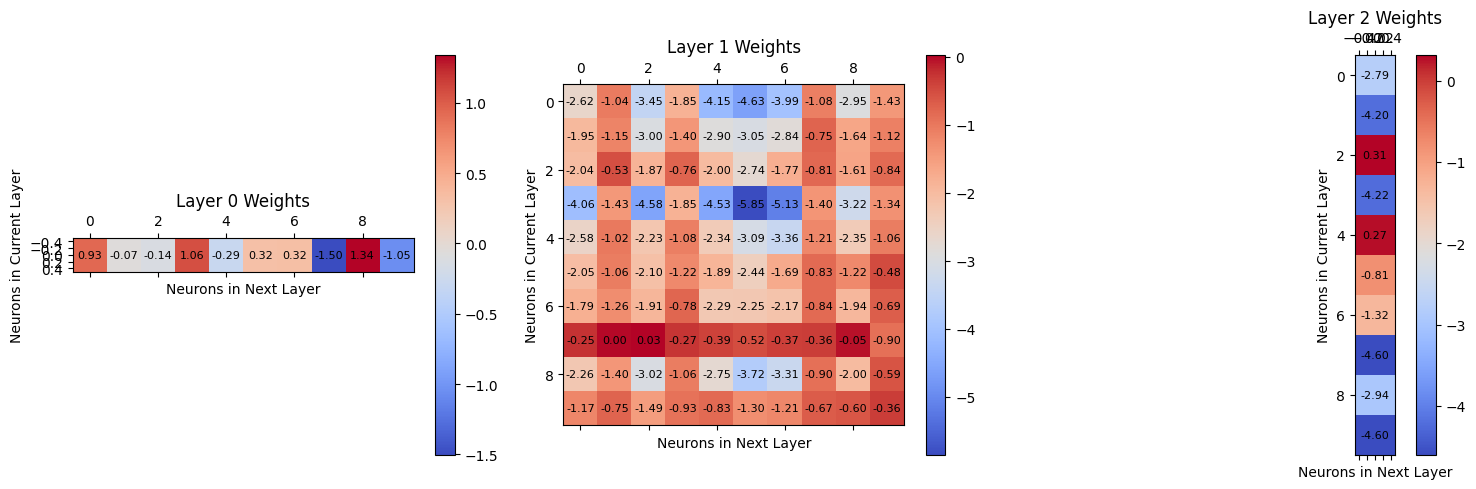

MSE on test data after epoch 20: 7532.054201960183
MSE on test data after epoch 40: 7528.435698897236
MSE on test data after epoch 60: 7523.938783079749
MSE on test data after epoch 80: 7518.2333382342795
MSE on test data after epoch 100: 7510.823877618931
MSE on test data after epoch 120: 7500.955885440231
MSE on test data after epoch 140: 7487.48823642958
MSE on test data after epoch 160: 7468.801322624035
MSE on test data after epoch 180: 7443.047829705644
MSE on test data after epoch 200: 7409.261217901064
MSE on test data after epoch 220: 7368.306436062328
MSE on test data after epoch 240: 7321.296504174803
MSE on test data after epoch 260: 7269.575829351448
MSE on test data after epoch 280: 7217.073810445986
MSE on test data after epoch 300: 7168.484594119051
MSE on test data after epoch 320: 7124.774347965494
MSE on test data after epoch 340: 7082.305769986418
MSE on test data after epoch 360: 7035.279560724721
MSE on test data after epoch 380: 6976.5135433326905
MSE on test dat

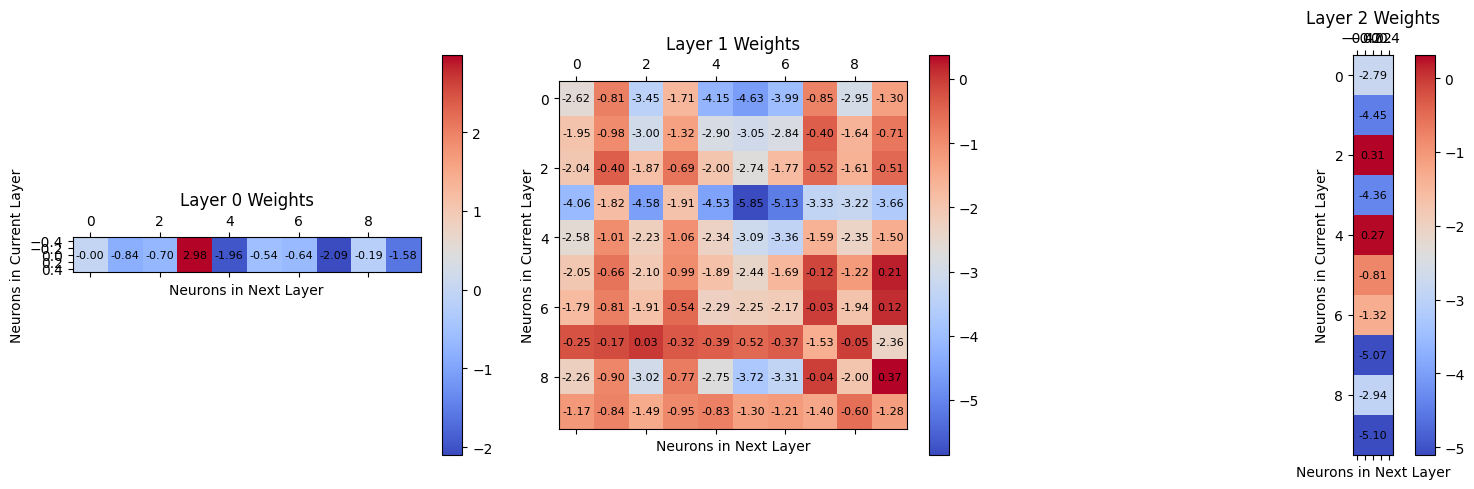

MSE on test data after epoch 1020: 161.36838320311645
MSE on test data after epoch 1040: 160.3815805323731
MSE on test data after epoch 1060: 159.4238246607834
MSE on test data after epoch 1080: 158.4937032214374
MSE on test data after epoch 1100: 157.5898920311057
MSE on test data after epoch 1120: 156.71114946927398
MSE on test data after epoch 1140: 155.85631105697345
MSE on test data after epoch 1160: 155.02428427794723
MSE on test data after epoch 1180: 154.21404366688742
MSE on test data after epoch 1200: 153.42462617681275
MSE on test data after epoch 1220: 152.6551268287773
MSE on test data after epoch 1240: 151.90469464106636
MSE on test data after epoch 1260: 151.17252883044046
MSE on test data after epoch 1280: 150.45787527563482
MSE on test data after epoch 1300: 149.76002323083128
MSE on test data after epoch 1320: 149.078302276366
MSE on test data after epoch 1340: 148.4120794927578
MSE on test data after epoch 1360: 147.76075684450777
MSE on test data after epoch 1380: 1

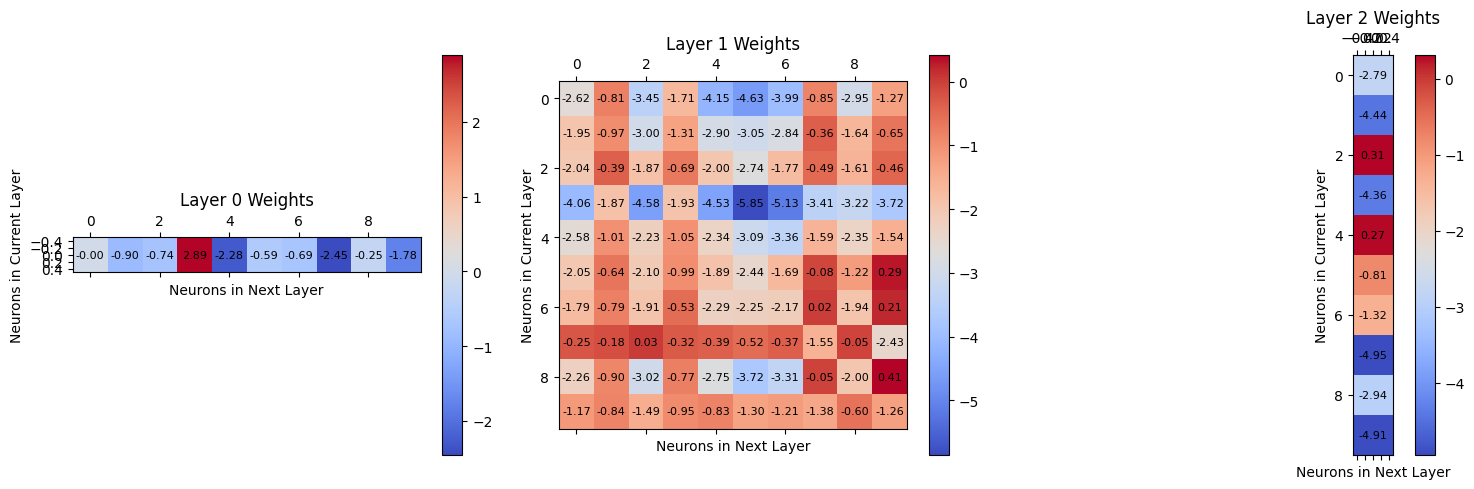

MSE on test data after epoch 2020: 132.0280923723408
MSE on test data after epoch 2040: 131.67283317694475
MSE on test data after epoch 2060: 131.3225793608433
MSE on test data after epoch 2080: 130.97720339795762
MSE on test data after epoch 2100: 130.63658202718452
MSE on test data after epoch 2120: 130.30059608513008
MSE on test data after epoch 2140: 129.9691303480155
MSE on test data after epoch 2160: 129.64207338212546
MSE on test data after epoch 2180: 129.31931740218198
MSE on test data after epoch 2200: 129.00075813702756
MSE on test data after epoch 2220: 128.68629470214108
MSE on test data after epoch 2240: 128.375829478464
MSE on test data after epoch 2260: 128.06926799711673
MSE on test data after epoch 2280: 127.76651882956644
MSE on test data after epoch 2300: 127.4674934829215
MSE on test data after epoch 2320: 127.1721062998865
MSE on test data after epoch 2340: 126.88027436322794
MSE on test data after epoch 2360: 126.59191740429151
MSE on test data after epoch 2380: 

KeyboardInterrupt: 

In [50]:
network = NeuralNetwork([1,10,10,1], 0.3)

def train_until_target(nn, inputs_train, targets_train, inputs_test, targets_test, min_train_y, max_train_y, max_epochs=30000, mse_threshold=4):
    epoch = 0
    while epoch < max_epochs:
       
        nn.train(inputs_train, targets_train, epochs=1)
        predictions_test = nn.predict(inputs_test)

        predictions_denormalized = denormalize(predictions_test, min_train_y, max_train_y)
        mse_test = np.average((predictions_denormalized- targets_test)**2)
        
        if epoch%20 ==0:
            print(f"MSE on test data after epoch {epoch}: {mse_test}")
        if epoch% 1000 == 0:
            
            nn.visualize_weights()
        if mse_test < mse_threshold:
            print(f"Training stopped after {epoch} epochs with MSE = {mse_test}")
            break

        epoch += 1

train_until_target(network, X_train_normalized, y_train_normalized, X_test_normalized, y_test, min_train_y, max_train_y)